# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
       # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | constantia
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | benghazi
Processing Record 5 of Set 1 | isla
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | askoy
Processing Record 16 of Set 1 | saudarkrokur
Processing Record 17 of Set 1 | dunedin
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | callao
Processing Record 20 of Set 1 | fale old settlement
Processing Record 21 of Set 1 | i-n-salah
Processing Record 22

Processing Record 37 of Set 4 | new glasgow
Processing Record 38 of Set 4 | yerofey pavlovich
Processing Record 39 of Set 4 | leava
Processing Record 40 of Set 4 | namibe
Processing Record 41 of Set 4 | saint-pierre
Processing Record 42 of Set 4 | ulsteinvik
Processing Record 43 of Set 4 | gueltat zemmour
City not found. Skipping...
Processing Record 44 of Set 4 | fortaleza
Processing Record 45 of Set 4 | puerto gaitan
Processing Record 46 of Set 4 | gubkinskiy
Processing Record 47 of Set 4 | vilhena
Processing Record 48 of Set 4 | noosa heads
Processing Record 49 of Set 4 | chernomorskoye
Processing Record 0 of Set 5 | tolanaro
Processing Record 1 of Set 5 | uturoa
Processing Record 2 of Set 5 | kapa'a
Processing Record 3 of Set 5 | zuni pueblo
Processing Record 4 of Set 5 | majene
Processing Record 5 of Set 5 | mitu
Processing Record 6 of Set 5 | lefka
Processing Record 7 of Set 5 | turabah
Processing Record 8 of Set 5 | coquimbo
Processing Record 9 of Set 5 | dourados
Processing Rec

Processing Record 30 of Set 8 | iquique
Processing Record 31 of Set 8 | sao vicente
Processing Record 32 of Set 8 | fisterra
Processing Record 33 of Set 8 | takoradi
Processing Record 34 of Set 8 | kannur
Processing Record 35 of Set 8 | sinop
Processing Record 36 of Set 8 | germantown
Processing Record 37 of Set 8 | crane
Processing Record 38 of Set 8 | muang khong
Processing Record 39 of Set 8 | axim
Processing Record 40 of Set 8 | kashmar
Processing Record 41 of Set 8 | guercif
Processing Record 42 of Set 8 | podujeva
Processing Record 43 of Set 8 | atar
Processing Record 44 of Set 8 | akita
Processing Record 45 of Set 8 | tangalle
Processing Record 46 of Set 8 | lata
Processing Record 47 of Set 8 | duong dong
Processing Record 48 of Set 8 | inarajan village
Processing Record 49 of Set 8 | makokou
Processing Record 0 of Set 9 | katsuura
Processing Record 1 of Set 9 | popondetta
Processing Record 2 of Set 9 | shenjiamen
Processing Record 3 of Set 9 | fuling
Processing Record 4 of Set 

Processing Record 19 of Set 12 | stropkov
Processing Record 20 of Set 12 | yarkovo
Processing Record 21 of Set 12 | haselunne
Processing Record 22 of Set 12 | vilyuchinsk
Processing Record 23 of Set 12 | p'yongsong
Processing Record 24 of Set 12 | asikkala
Processing Record 25 of Set 12 | alamogordo
Processing Record 26 of Set 12 | constitucion
Processing Record 27 of Set 12 | fredericton
Processing Record 28 of Set 12 | zwedru
Processing Record 29 of Set 12 | galle
Processing Record 30 of Set 12 | velikiye luki
Processing Record 31 of Set 12 | berezovyy
Processing Record 32 of Set 12 | paita
Processing Record 33 of Set 12 | hami
Processing Record 34 of Set 12 | tutoia
Processing Record 35 of Set 12 | aguilares
Processing Record 36 of Set 12 | iquitos
Processing Record 37 of Set 12 | plastun
Processing Record 38 of Set 12 | pizarro
Processing Record 39 of Set 12 | mogoytuy
Processing Record 40 of Set 12 | kiomboi
Processing Record 41 of Set 12 | muroto-misakicho
Processing Record 42 of

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,295.49,62,75,3.09,US,1690760403
1,constantia,44.1833,28.6500,292.53,80,45,4.46,RO,1690760200
2,adamstown,-25.0660,-130.1015,291.79,56,33,8.77,PN,1690760102
3,benghazi,32.1167,20.0667,299.95,70,0,6.05,LY,1690760692
4,isla,15.8939,120.3036,299.29,89,100,1.72,PH,1690760701


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,295.49,62,75,3.09,US,1690760403
1,constantia,44.1833,28.6500,292.53,80,45,4.46,RO,1690760200
2,adamstown,-25.0660,-130.1015,291.79,56,33,8.77,PN,1690760102
3,benghazi,32.1167,20.0667,299.95,70,0,6.05,LY,1690760692
4,isla,15.8939,120.3036,299.29,89,100,1.72,PH,1690760701


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

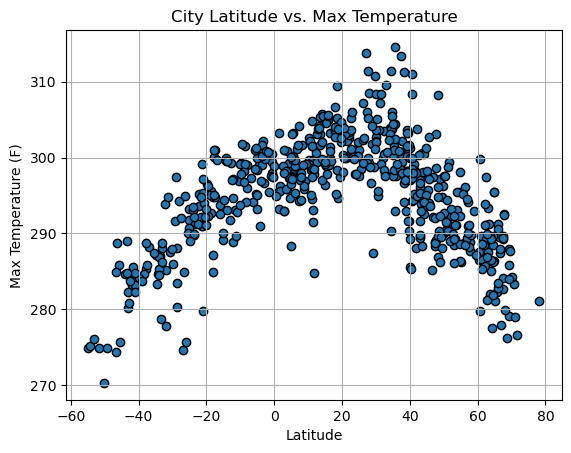

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

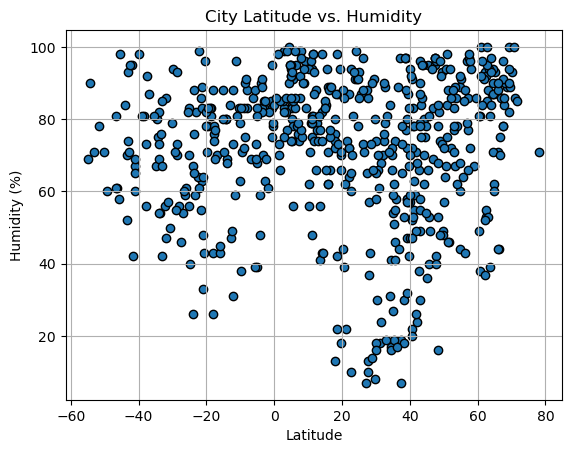

In [13]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

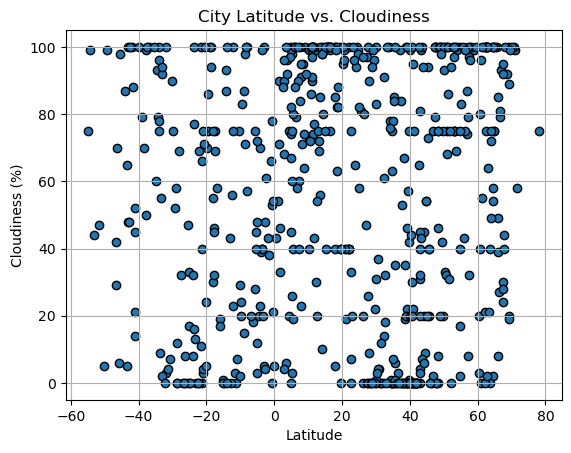

In [56]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

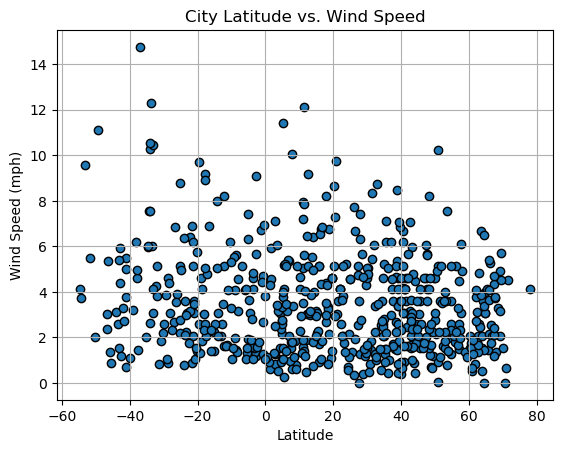

In [15]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots with blue circles and text above the graph
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get the regression values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot with blue circles and no outline
    plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="none")
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Add the regression equation and r-value as text above the graph
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    r_value_str = f"The r-value is: {rvalue:.2f}"
    plt.text(min(x_values), max(y_values) + (max(y_values) - min(y_values)) * 0.1, equation, fontsize=12, color="red")
    plt.text(min(x_values), max(y_values) + (max(y_values) - min(y_values)) * 0.2, r_value_str, fontsize=12, color="red")
    
    # Incorporate other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
    # Show the plot
    plt.show()

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,295.49,62,75,3.09,US,1690760403
1,constantia,44.1833,28.6500,292.53,80,45,4.46,RO,1690760200
3,benghazi,32.1167,20.0667,299.95,70,0,6.05,LY,1690760692
4,isla,15.8939,120.3036,299.29,89,100,1.72,PH,1690760701
6,iqaluit,63.7506,-68.5145,282.00,81,40,6.69,CA,1690760702


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,291.79,56,33,8.77,PN,1690760102
5,waitangi,-43.9535,-176.5597,284.72,84,87,3.13,NZ,1690760701
7,edinburgh of the seven seas,-37.0676,-12.3116,288.19,87,100,14.76,SH,1690760407
9,atafu village,-8.5421,-172.5159,301.53,75,71,5.61,TK,1690760407
10,ushuaia,-54.8000,-68.3000,274.96,69,75,4.12,AR,1690760410


###  Temperature vs. Latitude Linear Regression Plot

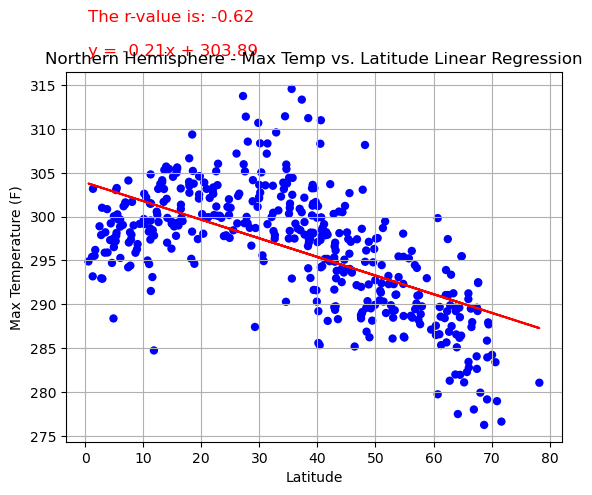

In [46]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (F)", "Northern Hemisphere - Max Temp vs. Latitude Linear Regression")


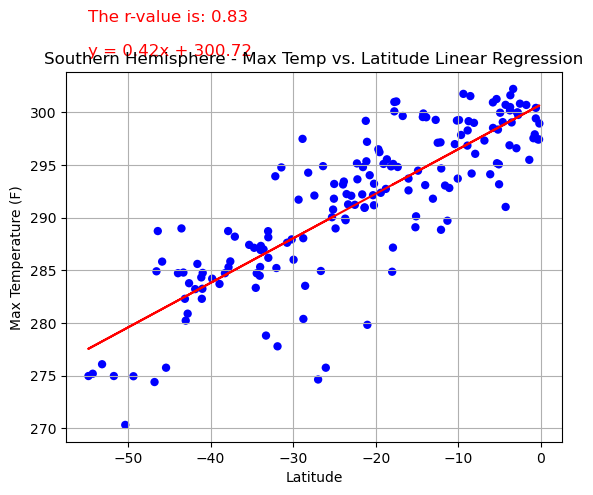

In [47]:
# Linear regression on Southern Hemisphere for Temperature vs. Latitude
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (F)", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

**Discussion about the linear relationship:** The r-value of 0.83 indicates a strong tendency for temperatures to increase as you move towards the Southern Hemisphere's lower latitudes.

### Humidity vs. Latitude Linear Regression Plot

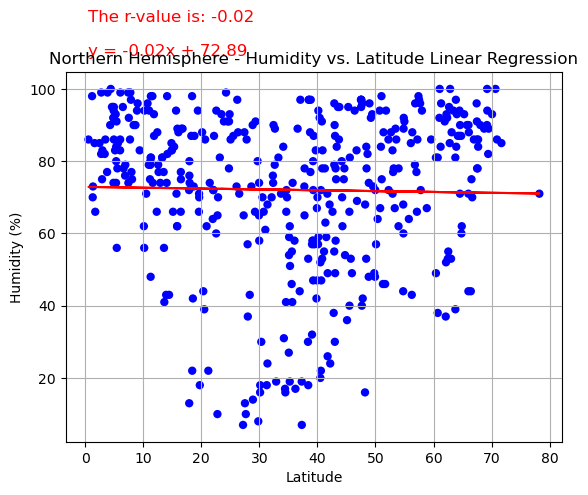

In [48]:
# Linear regression on Northern Hemisphere for Humidity vs. Latitude
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude Linear Regression")

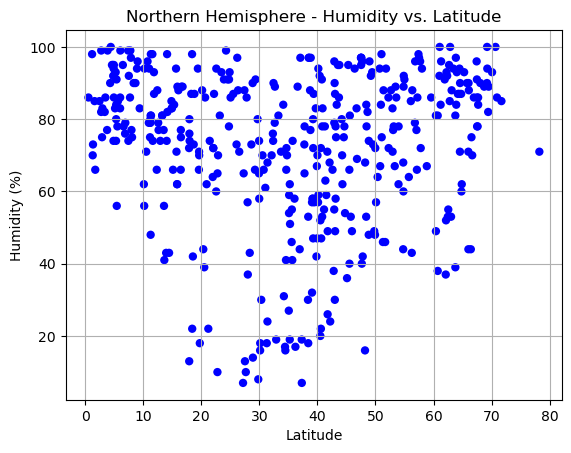

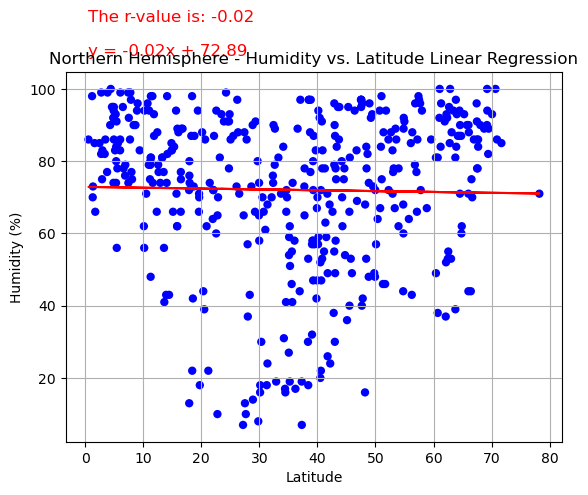

In [51]:
# Scatter plot for Northern Hemisphere for Humidity vs. Latitude
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", facecolors="blue", edgecolors="none")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()

# Linear regression on Northern Hemisphere for Humidity vs. Latitude
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude Linear Regression")

**Discussion about the linear relationship:** Since the r value is -.02, being closer to 0, there is really no strong correlation or conclusion we can derive from this data.

### Cloudiness vs. Latitude Linear Regression Plot

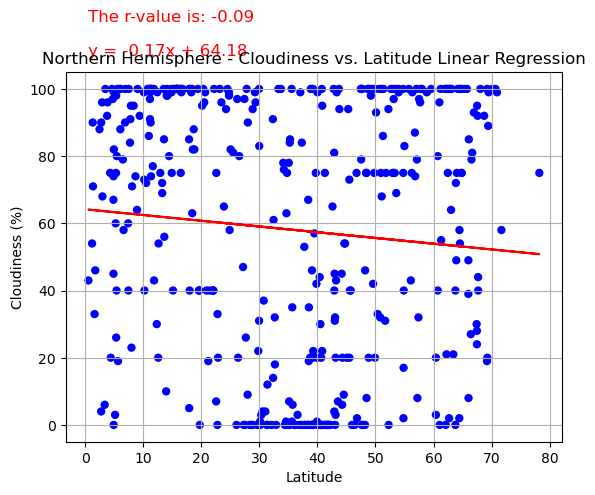

In [52]:
# Linear regression on Northern Hemisphere for Cloudiness vs. Latitude
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")


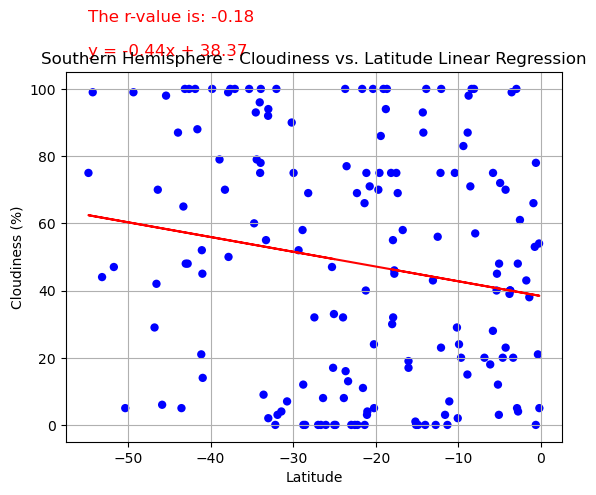

In [53]:
# Linear regression on Southern Hemisphere for Cloudiness vs. Latitude
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")


**Discussion about the linear relationship:**  There is a weak negative correlation between cloudiness and latitude in both hemispheres,

### Wind Speed vs. Latitude Linear Regression Plot

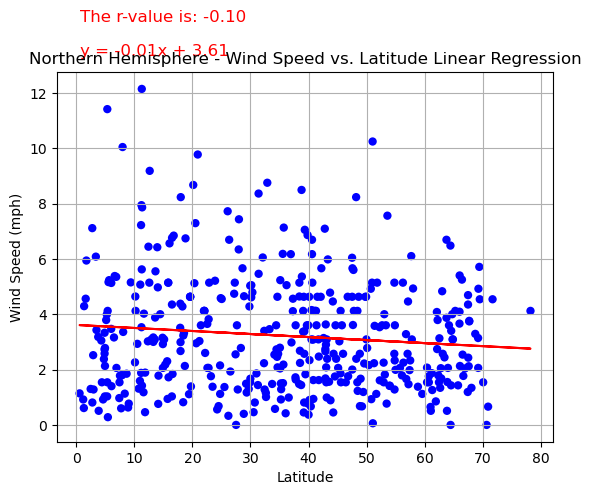

In [54]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")


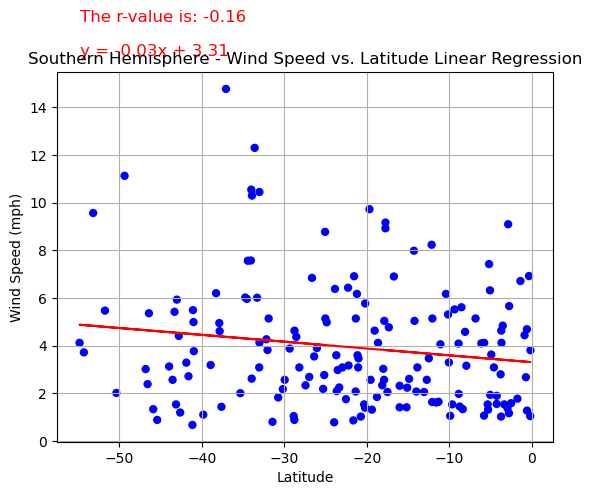

In [55]:

# Linear regression on Southern Hemisphere for Wind Speed vs. Latitude
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

**Discussion about the linear relationship:** There is a weak negative correlation between wind speed and latitude in both hemispheres.